## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  33.739562   440.132107  0.040075   9.982974    37.997598
1  43.317002  1244.773384  0.214287   8.893669   270.339207
2  97.067464   301.836350  0.198497  10.355048   113.989629
3  20.632620  1639.564193  0.992242   9.238384  1626.919195
4  66.363414   917.564862  0.925668   7.669559   851.880076


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9976838	total: 58ms	remaining: 57.9s
1:	learn: 0.9856496	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9759503	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9654641	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9523830	total: 60.1ms	remaining: 11.9s
5:	learn: 0.9419778	total: 60.7ms	remaining: 10s
6:	learn: 0.9303028	total: 61.1ms	remaining: 8.66s
7:	learn: 0.9187470	total: 61.5ms	remaining: 7.62s
8:	learn: 0.9060806	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8931305	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8810211	total: 62.8ms	remaining: 5.64s
11:	learn: 0.8684060	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8571016	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8457240	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8365443	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8272875	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8167057	total: 65ms	remaining: 3.76s
17:	learn: 0.8067833	total: 65.4ms	remaining: 3.57s
18:	learn: 0.7995176	total: 65.8ms	remaining: 3.4s
1

106:	learn: 0.3008201	total: 105ms	remaining: 879ms
107:	learn: 0.2977217	total: 106ms	remaining: 876ms
108:	learn: 0.2953130	total: 107ms	remaining: 871ms
109:	learn: 0.2915809	total: 107ms	remaining: 867ms
110:	learn: 0.2885575	total: 108ms	remaining: 862ms
111:	learn: 0.2856294	total: 108ms	remaining: 857ms
112:	learn: 0.2823662	total: 109ms	remaining: 853ms
113:	learn: 0.2793495	total: 109ms	remaining: 848ms
114:	learn: 0.2771330	total: 110ms	remaining: 843ms
115:	learn: 0.2741588	total: 110ms	remaining: 839ms
116:	learn: 0.2713273	total: 111ms	remaining: 835ms
117:	learn: 0.2693219	total: 111ms	remaining: 831ms
118:	learn: 0.2665524	total: 112ms	remaining: 826ms
119:	learn: 0.2638421	total: 112ms	remaining: 821ms
120:	learn: 0.2613586	total: 113ms	remaining: 818ms
121:	learn: 0.2591192	total: 113ms	remaining: 814ms
122:	learn: 0.2564343	total: 114ms	remaining: 810ms
123:	learn: 0.2539475	total: 114ms	remaining: 806ms
124:	learn: 0.2511077	total: 115ms	remaining: 802ms
125:	learn: 

289:	learn: 0.0589577	total: 186ms	remaining: 455ms
290:	learn: 0.0585620	total: 186ms	remaining: 454ms
291:	learn: 0.0580665	total: 187ms	remaining: 453ms
292:	learn: 0.0576178	total: 187ms	remaining: 452ms
293:	learn: 0.0572950	total: 188ms	remaining: 451ms
294:	learn: 0.0568914	total: 188ms	remaining: 450ms
295:	learn: 0.0565279	total: 189ms	remaining: 448ms
296:	learn: 0.0560559	total: 189ms	remaining: 447ms
297:	learn: 0.0557055	total: 189ms	remaining: 446ms
298:	learn: 0.0552494	total: 190ms	remaining: 445ms
299:	learn: 0.0548958	total: 190ms	remaining: 444ms
300:	learn: 0.0545222	total: 191ms	remaining: 443ms
301:	learn: 0.0542706	total: 191ms	remaining: 442ms
302:	learn: 0.0539868	total: 192ms	remaining: 441ms
303:	learn: 0.0536952	total: 192ms	remaining: 440ms
304:	learn: 0.0534485	total: 192ms	remaining: 439ms
305:	learn: 0.0531432	total: 193ms	remaining: 437ms
306:	learn: 0.0527498	total: 193ms	remaining: 436ms
307:	learn: 0.0524551	total: 194ms	remaining: 435ms
308:	learn: 

520:	learn: 0.0189683	total: 287ms	remaining: 264ms
521:	learn: 0.0188852	total: 288ms	remaining: 264ms
522:	learn: 0.0187870	total: 288ms	remaining: 263ms
523:	learn: 0.0187274	total: 289ms	remaining: 262ms
524:	learn: 0.0186689	total: 289ms	remaining: 261ms
525:	learn: 0.0186113	total: 289ms	remaining: 261ms
526:	learn: 0.0185231	total: 290ms	remaining: 260ms
527:	learn: 0.0184359	total: 290ms	remaining: 259ms
528:	learn: 0.0183508	total: 291ms	remaining: 259ms
529:	learn: 0.0182673	total: 291ms	remaining: 258ms
530:	learn: 0.0181846	total: 292ms	remaining: 258ms
531:	learn: 0.0180862	total: 292ms	remaining: 257ms
532:	learn: 0.0180055	total: 293ms	remaining: 256ms
533:	learn: 0.0179092	total: 293ms	remaining: 256ms
534:	learn: 0.0178319	total: 294ms	remaining: 255ms
535:	learn: 0.0177191	total: 294ms	remaining: 255ms
536:	learn: 0.0176851	total: 294ms	remaining: 254ms
537:	learn: 0.0175928	total: 295ms	remaining: 253ms
538:	learn: 0.0175171	total: 296ms	remaining: 253ms
539:	learn: 

697:	learn: 0.0094514	total: 368ms	remaining: 159ms
698:	learn: 0.0094211	total: 368ms	remaining: 159ms
699:	learn: 0.0094135	total: 369ms	remaining: 158ms
700:	learn: 0.0093876	total: 369ms	remaining: 158ms
701:	learn: 0.0093590	total: 370ms	remaining: 157ms
702:	learn: 0.0093310	total: 370ms	remaining: 157ms
703:	learn: 0.0093255	total: 371ms	remaining: 156ms
704:	learn: 0.0093200	total: 371ms	remaining: 155ms
705:	learn: 0.0092760	total: 372ms	remaining: 155ms
706:	learn: 0.0092348	total: 372ms	remaining: 154ms
707:	learn: 0.0092079	total: 373ms	remaining: 154ms
708:	learn: 0.0092007	total: 373ms	remaining: 153ms
709:	learn: 0.0091937	total: 374ms	remaining: 153ms
710:	learn: 0.0091673	total: 374ms	remaining: 152ms
711:	learn: 0.0091621	total: 374ms	remaining: 151ms
712:	learn: 0.0091363	total: 375ms	remaining: 151ms
713:	learn: 0.0091294	total: 375ms	remaining: 150ms
714:	learn: 0.0091041	total: 376ms	remaining: 150ms
715:	learn: 0.0090930	total: 376ms	remaining: 149ms
716:	learn: 

929:	learn: 0.0046193	total: 470ms	remaining: 35.3ms
930:	learn: 0.0046004	total: 470ms	remaining: 34.8ms
931:	learn: 0.0045914	total: 470ms	remaining: 34.3ms
932:	learn: 0.0045725	total: 471ms	remaining: 33.8ms
933:	learn: 0.0045508	total: 471ms	remaining: 33.3ms
934:	learn: 0.0045324	total: 472ms	remaining: 32.8ms
935:	learn: 0.0045163	total: 472ms	remaining: 32.3ms
936:	learn: 0.0045072	total: 473ms	remaining: 31.8ms
937:	learn: 0.0044897	total: 473ms	remaining: 31.3ms
938:	learn: 0.0044742	total: 473ms	remaining: 30.7ms
939:	learn: 0.0044525	total: 474ms	remaining: 30.2ms
940:	learn: 0.0044357	total: 474ms	remaining: 29.7ms
941:	learn: 0.0044144	total: 474ms	remaining: 29.2ms
942:	learn: 0.0043935	total: 475ms	remaining: 28.7ms
943:	learn: 0.0043800	total: 475ms	remaining: 28.2ms
944:	learn: 0.0043715	total: 475ms	remaining: 27.7ms
945:	learn: 0.0043511	total: 476ms	remaining: 27.1ms
946:	learn: 0.0043310	total: 476ms	remaining: 26.6ms
947:	learn: 0.0043152	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

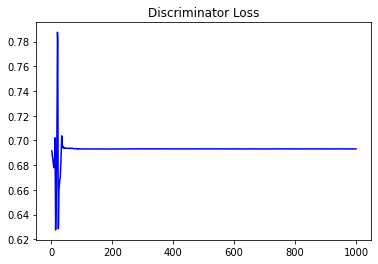

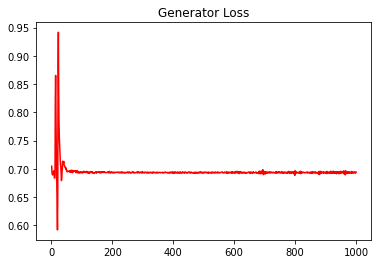

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.017277809400789074


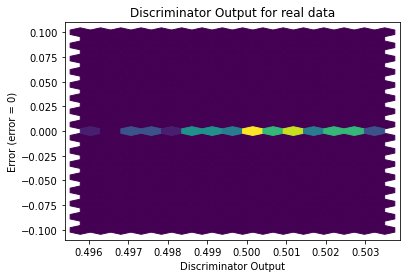

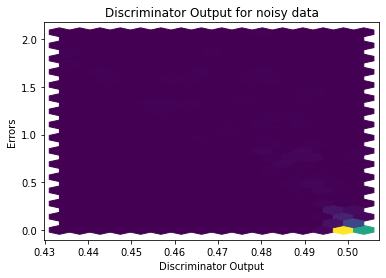

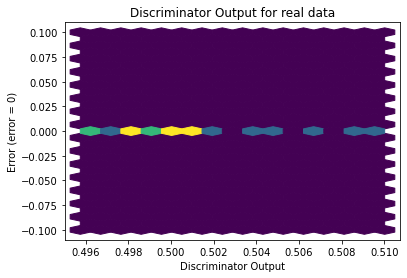

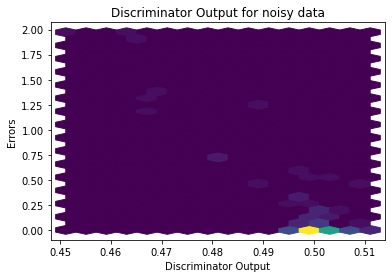

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


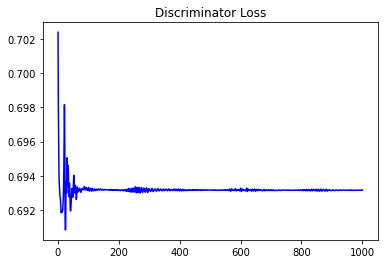

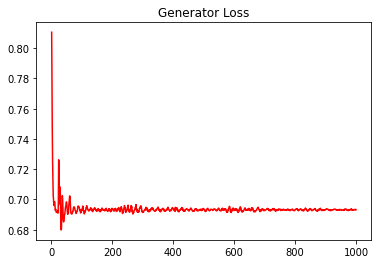

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03292130416800108


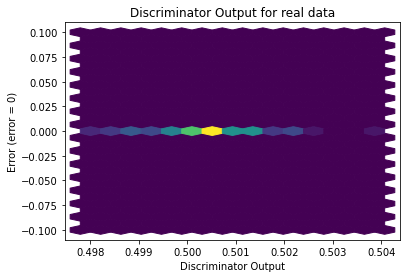

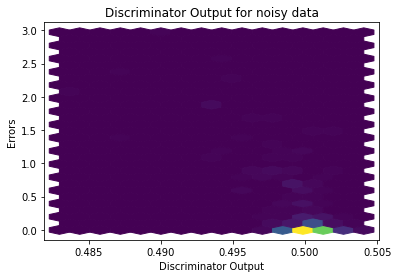

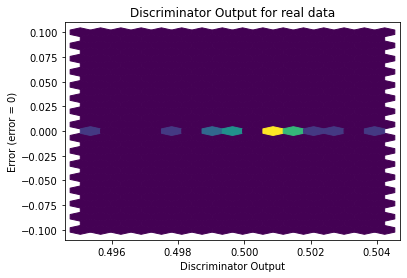

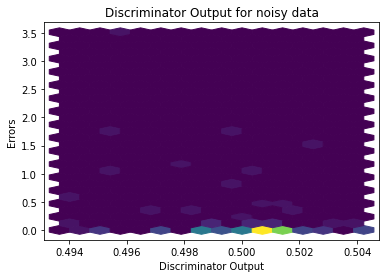

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0358]], requires_grad=True)
